Epoch 0 | Loss: 0.2832
Epoch 2000 | Loss: 0.2124
Epoch 4000 | Loss: 0.0572
Epoch 6000 | Loss: 0.0107
Epoch 8000 | Loss: 0.0047

Final predictions (rounded):
[[0.]
 [1.]
 [1.]
 [0.]]


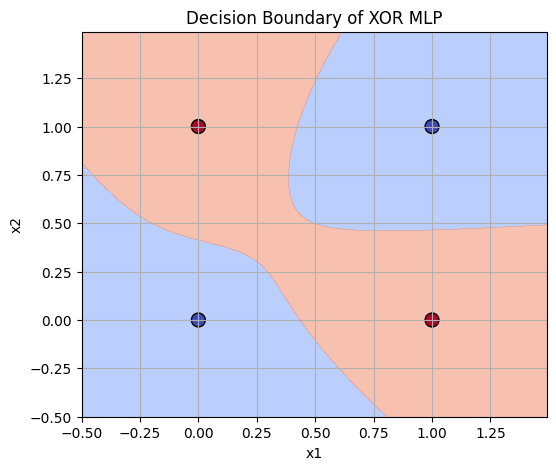

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Sigmoid and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# Initialize weights
np.random.seed(42)
input_dim = 2
hidden_dim = 4
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

# Training parameters
lr = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)

    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    # Loss
    loss = np.mean((y - a2) ** 2)

    # Backward pass
    dz2 = (a2 - y) * sigmoid_deriv(a2)
    dW2 = a1.T.dot(dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = dz2.dot(W2.T) * sigmoid_deriv(a1)
    dW1 = X.T.dot(dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 2000 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

# Final predictions
print("\nFinal predictions (rounded):")
print(np.round(a2))

# Decision boundary plot
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Forward pass on mesh
    z1 = sigmoid(grid.dot(W1) + b1)
    z2 = sigmoid(z1.dot(W2) + b2)
    predictions = z2.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], alpha=0.6, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    plt.title("Decision Boundary of XOR MLP")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, W1, b1, W2, b2)
